<a href="https://colab.research.google.com/github/QahirYousefi/02514-Deep-Learning-in-Computer/blob/master/Copy_of_Exercise_1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Exercise 1.1
## Classification of MNIST digits with a fully-connected neural network

In this exercise we will classify [MNIST digits](https://en.wikipedia.org/wiki/MNIST_database) using a fully-connected neural network

We start by importing the modules that we need

In [0]:
import numpy as np
from tqdm.notebook import tqdm
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

We check that we have a GPU available

In [0]:
if torch.cuda.is_available():
    print("The code will run on GPU. This is important so things run faster.")
else:
    print("The code will run on CPU. You should probably not do this.")
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')   

The code will run on GPU. This is important so things run faster.


The MNIST dataset is a built-in dataset in PyTorch (it is a very common dataset to test algorithms on). 

We import it, and set our minibatch size, by

In [0]:
batch_size = 64
trainset = datasets.MNIST('./data', train=True, download=True, transform=transforms.ToTensor())
train_loader = DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=1)
testset = datasets.MNIST('./data', train=False, download=True, transform=transforms.ToTensor())
test_loader = DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=1)

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


First we plot the images to get an idea of what data we're working with. MNIST images are $28\times28$ images of handwritten digits (0-9)

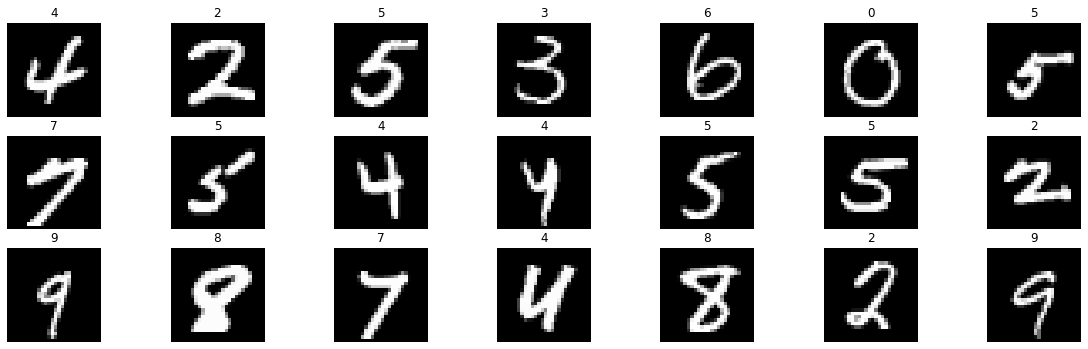

In [0]:
images, labels = next(iter(train_loader))
plt.figure(figsize=(20,10))

for i in range(21):
    plt.subplot(5,7,i+1)
    plt.imshow(images[i].numpy()[0], 'gray')
    plt.title(labels[i].item())
    plt.axis('off')

You shouild implement a fully-connected network to classify the digits. It should contain 1 hidden layer with 100 units. Don't forget the ReLU activation function after the hidden layer. 

In [0]:
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        self.fully_connected1 = nn.Sequential(
            nn.Linear(28*28,128)
            )
        
        self.fully_connected2 = nn.Sequential(
            nn.Linear(128,128)
        )

        self.output = nn.Sequential(
            nn.Linear(128,10),
            nn.Softmax(dim = 1)
            )
        
    def forward(self, x):
      #reshaping x so it becomes flat, except for the first dimension (which is the minibatch)
        x = x.view(x.size(0),-1)
        x = F.relu(self.fully_connected1(x))
        x = F.relu(self.fully_connected2(x))
        x = self.output(x)
        return x

We instantiate a copy of our network and transfer it to the GPU if it's available

In [0]:
model = Network()
model.to(device)
#Initialize the optimer
optimizer = torch.optim.SGD(model.parameters(), lr=0.15)

We train the network for five epochs

In [0]:
num_epochs = 5

for epoch in tqdm(range(num_epochs), unit='epoch'):
    #For each epoch
    train_correct = 0
    for minibatch_no, (data, target) in tqdm(enumerate(train_loader), total=len(train_loader)):
        data, target = data.to(device), target.to(device)
        #Zero the gradients computed for each weight
        optimizer.zero_grad()
        #Forward pass your image through the network
        output = model(data)
        #Compute the loss
        loss = F.nll_loss(torch.log(output), target)
        #Backward pass through the network
        loss.backward()
        #Update the weights
        optimizer.step()
        
        #Compute how many were correctly classified
        predicted = output.argmax(1)
        train_correct += (target==predicted).sum().cpu().item()
    #Comput the test accuracy
    test_correct = 0
    for data, target in test_loader:
        data = data.to(device)
        with torch.no_grad():
            output = model(data)
        predicted = output.argmax(1).cpu()
        test_correct += (target==predicted).sum().item()
    train_acc = train_correct/len(trainset)
    test_acc = test_correct/len(testset)
    print("Accuracy train: {train:.1f}%\t test: {test:.1f}%".format(test=100*test_acc, train=100*train_acc))


Accuracy train: 87.5%	 test: 94.9%



Accuracy train: 95.6%	 test: 96.3%



Accuracy train: 96.9%	 test: 96.9%



Accuracy train: 97.6%	 test: 97.4%



Accuracy train: 98.1%	 test: 97.1%



You should now have a model that has about 96% accuracy on the test set.
Try to get an even better accuracy. You can
* Change the number of hidden layers
* Change the number of units in the hidden layers
* Try using sigmoid instead of ReLU activation
* Try changing the learning rate

How large accuracy can you get?

Try showing the classification output (probabilities) from the model alongside the ground truth.

* Which are classified correctly/incorrectly? 
* If it's incorrect, what is the second most likely class?
* Does the misclassification use sense?

<Figure size 432x288 with 0 Axes>

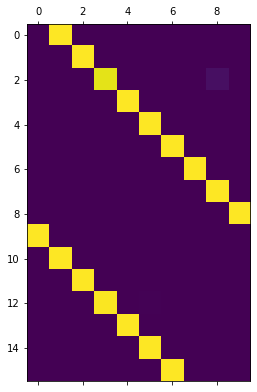

In [0]:
plt.figure()
plt.matshow(output.cpu())
plt.show()


In [0]:
output

tensor([[1.5787e-08, 9.9938e-01, 1.3096e-05, 6.1509e-05, 5.3627e-06, 1.8395e-07,
         3.0156e-07, 4.4146e-04, 9.4323e-05, 4.4281e-06],
        [7.5578e-08, 1.9816e-05, 9.9940e-01, 2.4755e-04, 2.6458e-12, 9.3970e-09,
         2.0987e-10, 1.0129e-05, 3.2678e-04, 3.6529e-08],
        [3.1557e-08, 4.9937e-05, 1.9467e-05, 9.5740e-01, 1.7367e-11, 2.6801e-03,
         6.4207e-10, 6.9909e-08, 3.9760e-02, 8.5594e-05],
        [3.7644e-11, 9.9348e-10, 7.1039e-11, 1.3578e-08, 9.9982e-01, 2.1020e-07,
         1.0836e-09, 3.7337e-08, 1.0837e-07, 1.7978e-04],
        [4.2637e-10, 1.1417e-12, 1.7479e-13, 9.2220e-06, 4.8899e-13, 9.9999e-01,
         7.6101e-12, 1.0857e-12, 1.0910e-06, 4.8501e-08],
        [3.2200e-06, 1.4857e-09, 1.3307e-07, 9.3053e-09, 2.0922e-07, 4.5029e-05,
         9.9995e-01, 8.1445e-12, 7.1721e-07, 3.1799e-09],
        [3.9067e-09, 1.1696e-06, 6.4606e-05, 5.7101e-04, 6.2014e-11, 1.9068e-09,
         1.3010e-13, 9.9936e-01, 2.4348e-07, 1.2239e-07],
        [1.7311e-05, 5.9974